# TO DO:
- transform review scores into 3 classes
- down sampling
- process missing values
- look at data distribution and check if transformation is needed
- feature correlations
- PCA to reduce dimension
- baseline model(Logit)

*host_response_time, host_response_rate which to drop

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [54]:
listing = pd.read_csv('listings_processed.csv', sep= '\t', index_col=0)
listing = listing.drop('id',1)
listing = listing[pd.notnull(listing['review_scores_rating'])]

In [55]:
listing.host_response_time.corr(listing.host_response_rate) ##scatterplot

-0.608733144967831

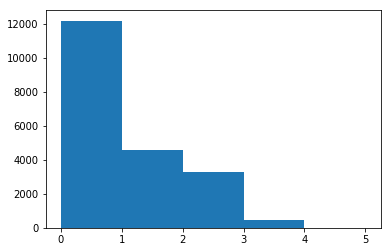

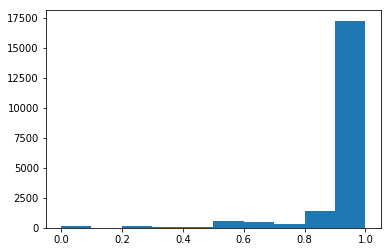

In [56]:
plt.hist(listing.host_response_time.dropna(), bins = 5,range=(0,5))
plt.show()
plt.hist(listing.host_response_rate.dropna(), bins = 10,range=(0,1))
plt.show()

In [57]:
listing = listing.drop('host_response_rate',1)

## Transform review scores into 3 classes

In [58]:
listing.review_scores_rating.describe()

count    38445.000000
mean        93.726648
std          8.448151
min         20.000000
25%         91.000000
50%         96.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

In [59]:
listing['Y'] = listing.review_scores_rating.apply((lambda x: 0 if 96<=x<=100 else 1 if 91<=x<=95 else 2))
listing = listing.drop('review_scores_rating',1)

# listing['Y'] = listing.review_scores_value
# listing = listing.drop('review_scores_value',1)

In [60]:
listing['Y'].describe()

count    38445.000000
mean         0.701756
std          0.820675
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: Y, dtype: float64

In [61]:
listing.Y.value_counts()

0    20389
1     9133
2     8923
Name: Y, dtype: int64

(array([20389.,  9133.,  8923.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12., 

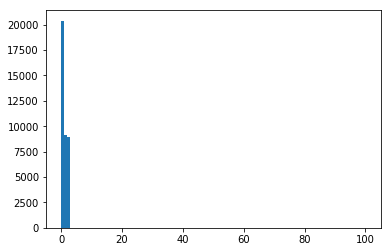

In [90]:
plt.hist(listing['Y'], bins=100,range=(0,100))

## Downsampling

In [62]:
dataset = listing[listing['Y'] == 0]
remaining = listing[listing['Y'] != 0]
out = dataset.sample(n=10000, random_state= 99)
data = remaining.append(out)
data = data.sort_index()
data.shape

# dataset = listing[listing['Y'] == 1]
# remaining = listing[listing['Y'] != 1]
# out = dataset.sample(n=11000, random_state= 99)
# data = remaining.append(out)
# data = data.sort_index()
# data.shape

(28056, 193)

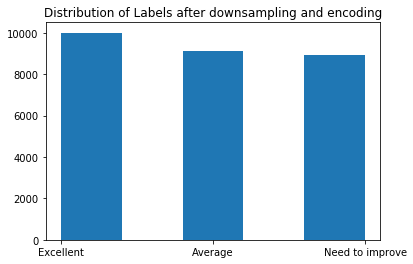

In [89]:
plt.hist(data['Y'], bins=5,range=(0,2))
plt.xticks(np.arange(3), ('Excellent', 'Average', 'Need to improve'))
plt.title('Distribution of Labels after downsampling and encoding')
plt.show()

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28056 entries, 0 to 49784
Columns: 193 entries, host_response_time to Y
dtypes: float64(174), int64(17), object(2)
memory usage: 41.5+ MB


## Processing the missing values

In [64]:
drop_columns = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',\
                'review_scores_communication', 'review_scores_location','host_since_elapsed',\
                'availability_60', 'availability_90', 'availability_365','review_scores_value',\
               'host_total_listings_count','host_listings_count', 'number_of_reviews', 'reviews_per_month']
for column in drop_columns:
    data = data.drop(column,1)

In [13]:
replacewithzero = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',\
                   'security_deposit', 'host_location_if_local']
for column in replacewithzero:
    data[column].fillna(0, inplace=True)

In [14]:
replacewithmedian = ['host_response_time', 'bathrooms', 'bedrooms', 'beds','cleaning_fee','calendar_updated']
for column in replacewithmedian:
    data[column].fillna(data[column].describe()['50%'], inplace=True)
    
data['host_response_time_missing'] = data['host_response_time'].isna().astype('int')
data['calendar_updated'].replace(-1, data.calendar_updated.describe()['max'], inplace=True)

In [15]:
for column in data.columns:
    if data[column].isna().sum()>0:
        print(column)

In [ ]:
plt.hist(data.price, bins = 50, range=(0,2000))
plt.show()
plt.hist(np.log(data.price), bins = 10, range=(0,20))
plt.show()

In [ ]:
plt.hist(data.security_deposit, bins = 30, range=(0,2000))
plt.show()
plt.hist(np.log(data.security_deposit), bins = 60, range=(0,20))
plt.show()

In [ ]:
data.cleaning_fee.describe()

In [ ]:
plt.hist(data.cleaning_fee, bins = 30, range=(0,625))
plt.show()
plt.hist(np.log(data.cleaning_fee), bins = 30, range=(0,20))
plt.show()

In [ ]:
listing.maximum_nights.describe()

In [ ]:
plt.hist(np.log(data.maximum_nights), bins = 30, range=(0,10))
plt.show()

In [ ]:
data.calendar_updated.describe()

In [ ]:
plt.hist(data.calendar_updated, bins = 30, range=(0,2000))
plt.show()
plt.hist(np.log(data.calendar_updated), bins = 50, range=(0,20))
plt.show()

In [ ]:
data.number_of_reviews.describe()

In [ ]:
plt.hist(data.number_of_reviews, bins = 30, range=(0,2000))
plt.show()
plt.hist(np.log(data.number_of_reviews), bins = 60, range=(0,20))
plt.show()

In [ ]:
data['reviews_per_month'].corr(data['number_of_reviews']) #drop??

## should log
price, security_deposit, cleaning_fee, calendar_updated

discuss: review_per_month, number_of_reviews, maximum_nights

In [16]:
log = ['price', 'security_deposit', 'cleaning_fee', 'calendar_updated']
for column in log:
    data[column].replace(0,0.000000000001,inplace=True)
    data[column] = np.log(data[column])

In [17]:
standardize = ['accommodates','bathrooms', 'bedrooms', 'beds','price','security_deposit','cleaning_fee',\
               'guests_included','extra_people','minimum_nights', 'calendar_updated','availability_30', \
               'calculated_host_listings_count']
for column in standardize:
    data[column].astype(np.float64)
    data[column] = preprocessing.scale(data[column])

/Users/JaneYY/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [18]:
data = data.drop('first_review', 1)
data = data.drop('last_review', 1)
data = data.drop('maximum_nights', 1)

## Benchmark Model

In [ ]:
data.corr()

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  #delete
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [20]:
X = data.drop(['Y'], axis=1)
Y = data['Y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=99)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=88)

In [21]:
from sklearn.metrics import confusion_matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    acc = np.diag(cm).sum() / float(cm.sum())
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('{},Acc={}'.format(title, acc))
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, np.round(cm[i, j],3),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

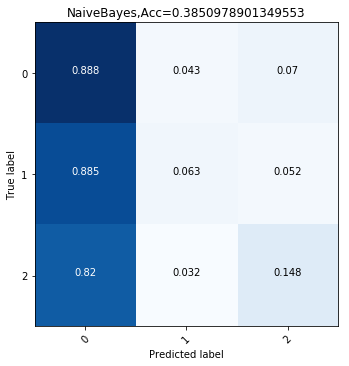

In [34]:
##benchmark
model_nb = GaussianNB()
model_nb.fit(X_train,Y_train)
preds_nb = model_nb.predict(X_val)

np.set_printoptions(precision=3)
plt.figure(figsize = (5,5))
plot_confusion_matrix(confusion_matrix(Y_val, preds_nb, labels=range(3)), classes=range(3), normalize=True,
                      title='NaiveBayes')
plt.show()

In [76]:
model_lr = LogisticRegression()
model_lr.fit(X_train,Y_train)
preds_lr = model_lr.predict(X_val)

In [24]:
model_dt = DecisionTreeClassifier(random_state=0, min_samples_split = 500, min_samples_leaf= 30)
model_dt.fit(X_train,Y_train)
preds_dt = model_dt.predict(X_val)

In [25]:
model_rf = RandomForestClassifier(n_estimators=100, min_samples_split = 100, min_samples_leaf = 10, random_state=0)
model_rf.fit(X_train,Y_train)
preds_rf = model_rf.predict(X_val)

In [70]:
model_gb = GradientBoostingClassifier(min_samples_split = 100, min_samples_leaf = 10, random_state=0)
model_gb.fit(X_train,Y_train)
preds_gb = model_gb.predict(X_val)

In [74]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier()
model_ada.fit(X_train,Y_train)
preds_ada = model_ada.predict(X_val)

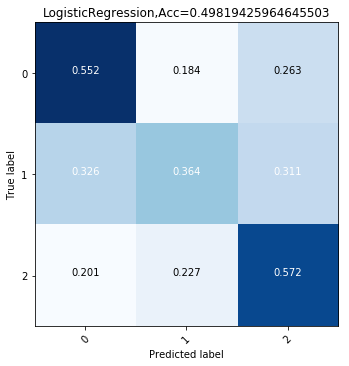

In [77]:
np.set_printoptions(precision=3)
plt.figure(figsize = (5,5))
plot_confusion_matrix(confusion_matrix(Y_val, preds_lr, labels=range(3)), classes=range(3), normalize=True,
                      title='LogisticRegression')
plt.show()

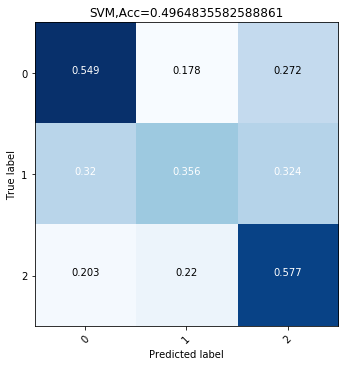

In [28]:
np.set_printoptions(precision=3)
plt.figure(figsize = (5,5))
plot_confusion_matrix(confusion_matrix(Y_val, preds_svm, labels=range(3)), classes=range(3), normalize=True,
                      title='SVM')
plt.show()

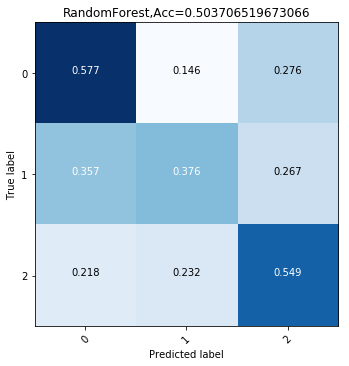

In [29]:
np.set_printoptions(precision=3)
plt.figure(figsize = (5,5))
plot_confusion_matrix(confusion_matrix(Y_val, preds_rf, labels=range(3)), classes=range(3), normalize=True,
                      title='RandomForest')
plt.show()

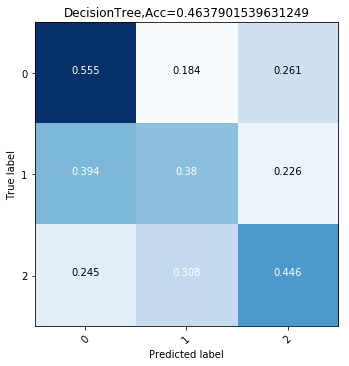

In [30]:
np.set_printoptions(precision=3)
plt.figure(figsize = (5,5))
plot_confusion_matrix(confusion_matrix(Y_val, preds_dt, labels=range(3)), classes=range(3), normalize=True,
                      title='DecisionTree')
plt.show()

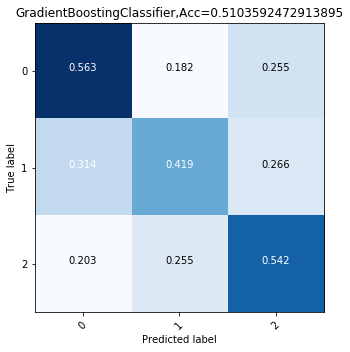

In [71]:
np.set_printoptions(precision=3)
plt.figure(figsize = (5,5))
plot_confusion_matrix(confusion_matrix(Y_val, preds_gb, labels=range(3)), classes=range(3), normalize=True,
                      title='GradientBoostingClassifier')
plt.show()

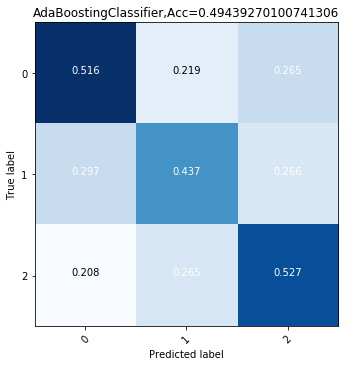

In [75]:
np.set_printoptions(precision=3)
plt.figure(figsize = (5,5))
plot_confusion_matrix(confusion_matrix(Y_val, preds_ada, labels=range(3)), classes=range(3), normalize=True,
                      title='AdaBoostingClassifier')
plt.show()

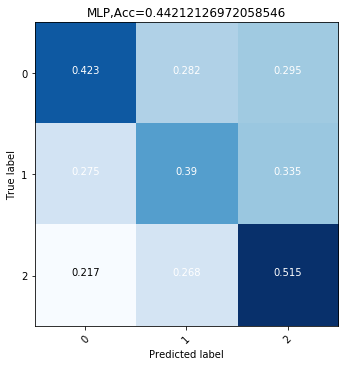

In [31]:
np.set_printoptions(precision=3)
plt.figure(figsize = (5,5))
plot_confusion_matrix(confusion_matrix(Y_val, preds_mlp, labels=range(3)), classes=range(3), normalize=True,
                      title='MLP')
plt.show()

In [ ]:
data.info()

In [ ]:
data.to_csv('finalData.csv', sep='\t')

(array([2.005e+04, 5.506e+03, 1.893e+03, 4.510e+02, 9.400e+01, 4.500e+01,
        1.000e+01, 5.000e+00, 2.000e+00, 2.000e+00]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

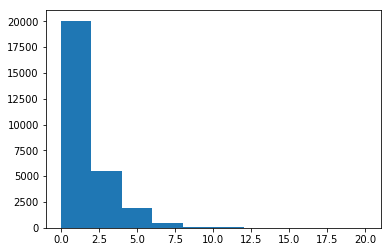

In [65]:
plt.hist(data.reviews_per_month, bins= 10, range=(0,20))

In [66]:
data.reviews_per_month.describe()

count    28056.000000
mean         1.469455
std          1.672633
min          0.010000
25%          0.230000
50%          0.820000
75%          2.212500
max         19.640000
Name: reviews_per_month, dtype: float64